In [1]:
#Problem statement : Predict the quality of an Apple

In [2]:
#importing required libraries to import and analyze the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import DistanceMetric
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import pickle
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,recall_score,precision_score


In [3]:
#importing the required data set
data=pd.read_csv(r"C:\Users\LENOVO\Downloads\apple_quality.csv")

In [4]:
data1=data.copy()

In [5]:
data1.shape

(4001, 9)

In [6]:
#info of the data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [7]:
#Finding no. of null values present for each column in the data
data1.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [8]:
#Dropping the null values
data1.drop(4000,axis=0,inplace=True)

In [9]:
data1["Acidity"]=data1["Acidity"].astype(float)

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 281.4+ KB


In [11]:
data1.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [12]:
data1

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 281.4+ KB


In [14]:
#Checking if the dataset is balanced or not
data1["Quality"].value_counts()

good    2004
bad     1996
Name: Quality, dtype: int64

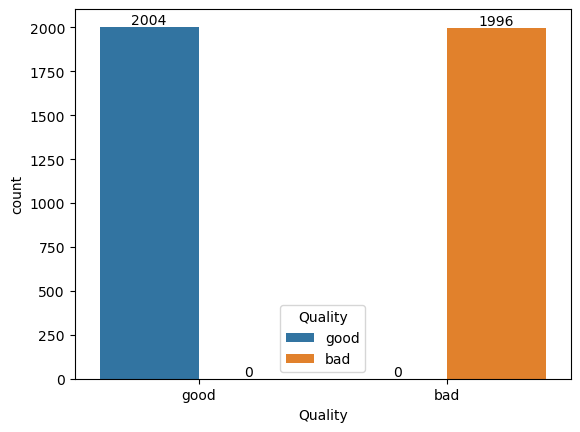

In [15]:
a=sns.countplot(data=data1,x=data1["Quality"],hue="Quality")
for i in a.containers:
    a.bar_label(i)
plt.show()

In [16]:
#Extracting the feature variables and class variables
fv=data1.iloc[:,1:-1] #feature variable
cv=data1.iloc[:,-1]  #class variable

Size


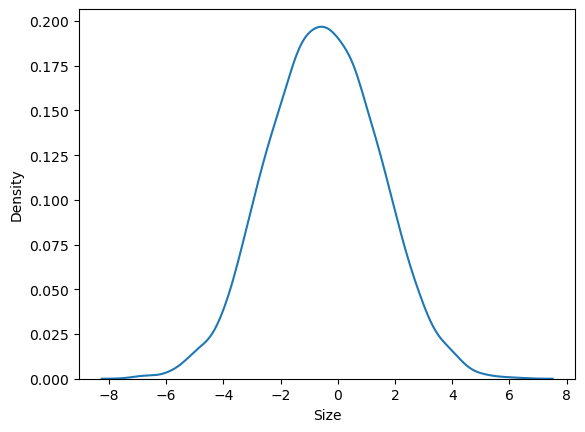

Weight


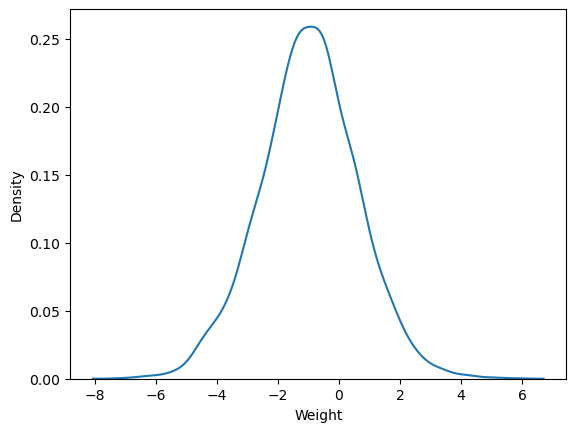

Sweetness


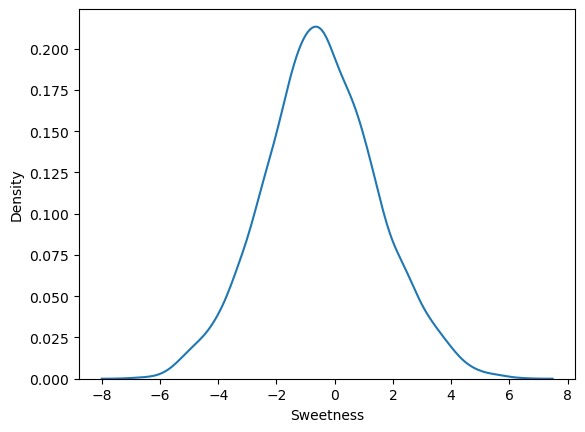

Crunchiness


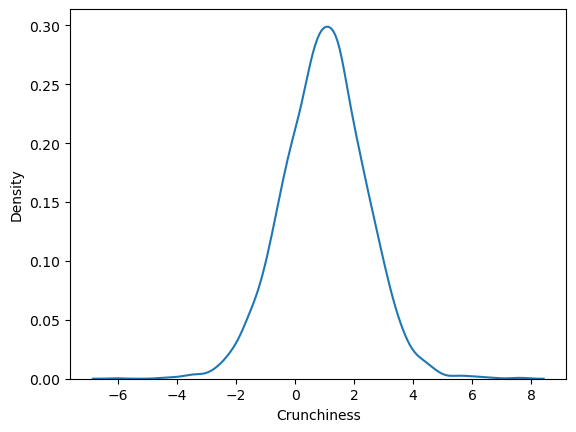

Juiciness


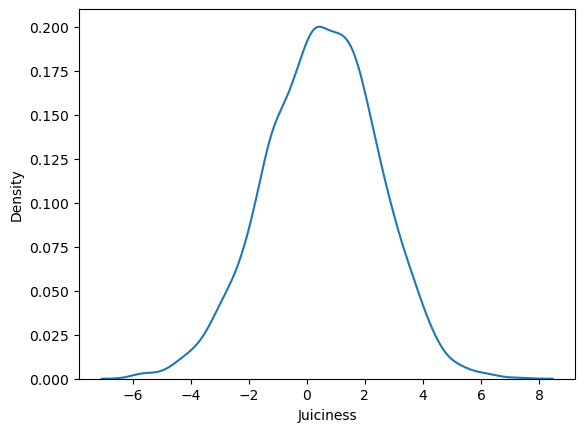

Ripeness


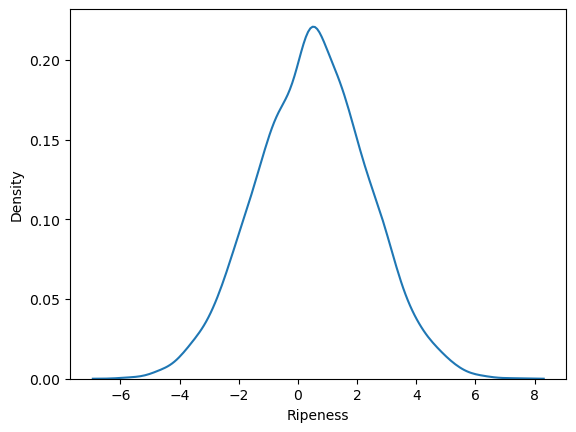

Acidity


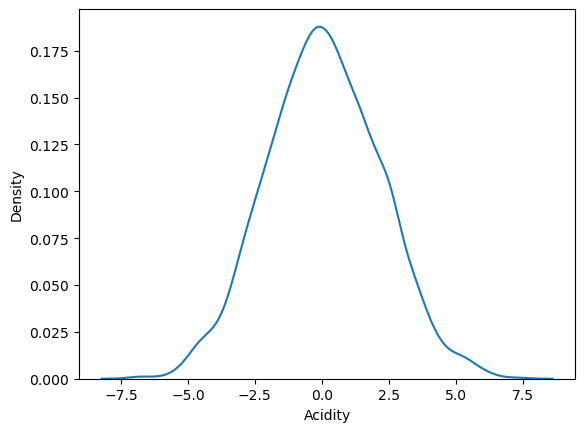

In [17]:
for y in fv.columns:
    sns.kdeplot(fv[y])
    print(y)
    plt.show()

In [18]:
#Finding the correlation between all the variable in the dataset
fv.corr(method="pearson")

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000


<Axes: >

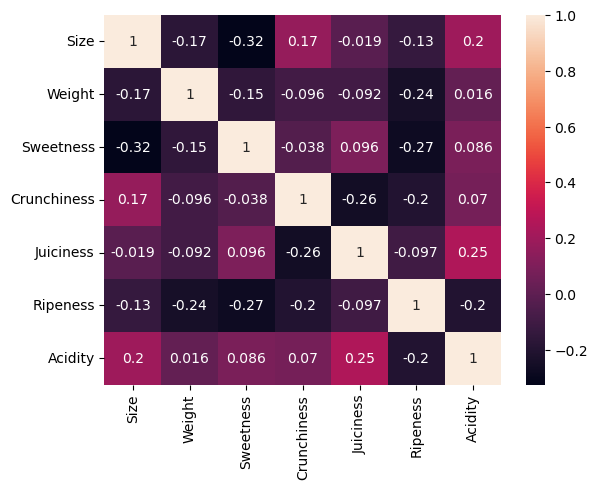

In [19]:
ax = sns.heatmap(fv.corr(), annot=True)
ax

No two feature variables are highly correlated in either way

In [20]:
fv.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984


In [21]:
cv.head()

0    good
1    good
2     bad
3    good
4    good
Name: Quality, dtype: object

In [23]:
#Dividing the dataset to train,test
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,stratify=cv,random_state=1)

In [24]:
x_train.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
1042,0.148672,-1.497965,-0.314322,-0.840648,3.563195,-1.603539,1.791805
3279,1.762092,2.050866,-1.375059,2.988179,-0.353031,-1.025432,3.200821
3736,-0.386819,0.957507,-0.315931,3.380672,-1.908308,-2.620454,0.022230
3019,-0.452303,-0.367928,-1.517538,1.842541,1.201533,0.492245,-0.844720
1893,1.457536,-1.088102,-0.718263,-2.046923,2.717242,-0.235078,1.126991


Size


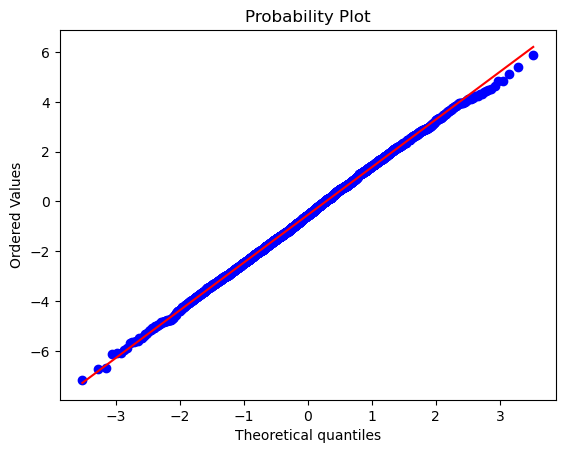

Weight


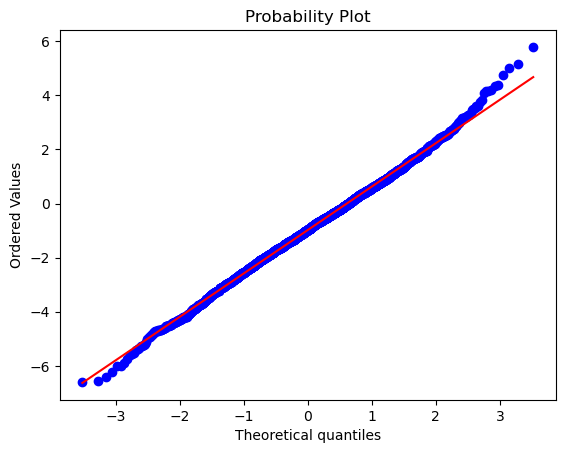

Sweetness


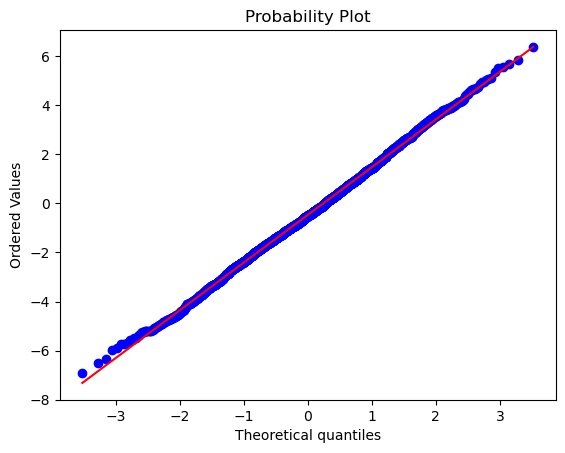

Crunchiness


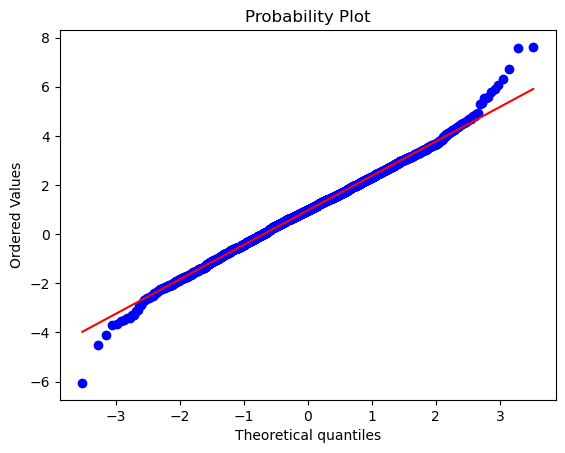

Juiciness


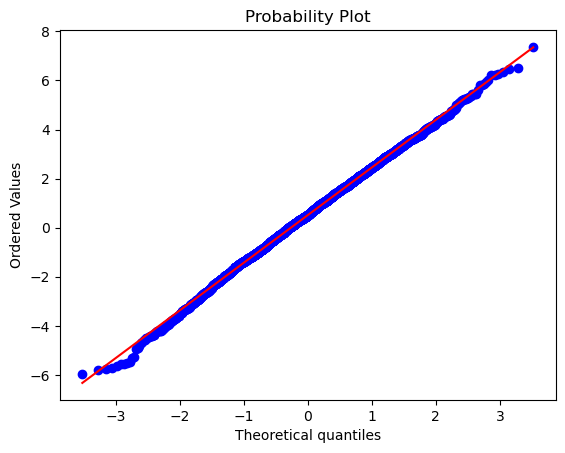

Ripeness


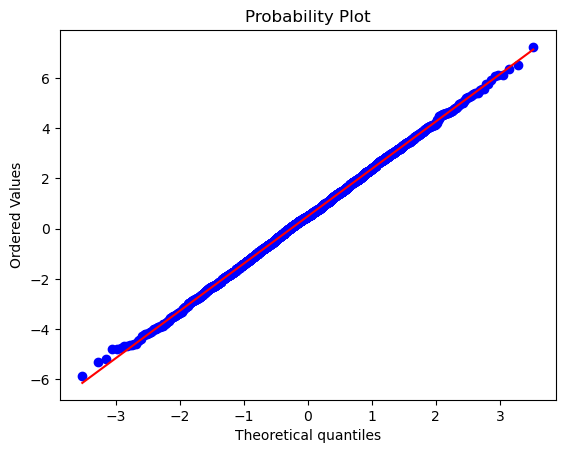

Acidity


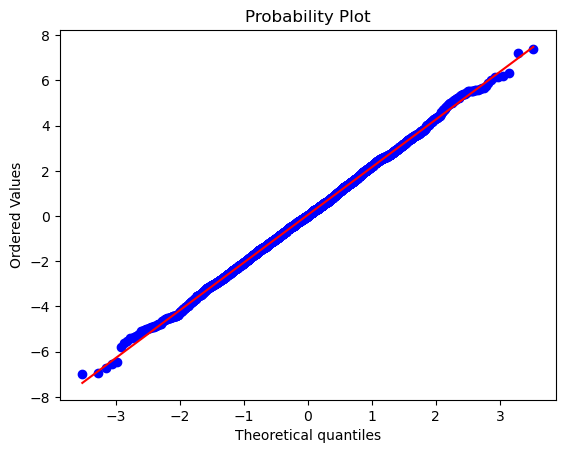

In [25]:
#Checking if all the columns follow normal distribution 
for y in x_train.columns:
    plt.subplot(111)
    ss.probplot(x_train[y], dist="norm",fit=True , plot=plt)
    print(y)
    plt.show()

In [26]:
#Pipeline to impute values
num_p=Pipeline([("imputing_n",SimpleImputer()),("scaling",StandardScaler())])

In [27]:
num_p

Pipeline(steps=[('imputing_n', SimpleImputer()), ('scaling', StandardScaler())])

In [28]:
ct=ColumnTransformer([("Numerical",num_p,x_train.columns)]) #Column transformer to transform columns

In [29]:
ct

ColumnTransformer(transformers=[('Numerical',
                                 Pipeline(steps=[('imputing_n',
                                                  SimpleImputer()),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object'))])

In [30]:
#Finalpieline for pre_processing and transformation
final_ppline=Pipeline([("Pre-processing",ct)])

In [31]:
gb1=GaussianNB()

In [32]:
#fitting the model based on training dataset
model=gb1.fit(final_ppline.fit_transform(x_train),y_train)

In [36]:
y_pred=model.predict(x_test)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [37]:
accuracy_score(y_test,y_pred)

0.73875

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bad       0.74      0.74      0.74       399
        good       0.74      0.74      0.74       401

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800



In [33]:
#Dumping the model

In [34]:
pickle.dump(model,open(r"C:\Users\LENOVO\Downloads\final_model.pkl","wb"))